# Sparse Coding from Scratch
Reference: P. O. Hoyer, “Non-negative sparse coding,” in Proceedings of the 12th IEEE Workshop on Neural Networks for Signal Processing, Martigny, Switzerland, 2002, pp. 557–565.

In [1]:
using Revise

In [2]:
using WAV
using LinearAlgebra
import Plots
using PyCall
using FFTW
using DSP
using LaTeXStrings
using Distributions

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1252


In [61]:
Plots.theme(:gruvbox_light)

$ \mathbf{X} = \mathbf{DZ} $

## Test Data

In [4]:
D = [1 1 1 1 1; 1 0 1 0 1; 0 1 0 1 0]'

5×3 Adjoint{Int64,Array{Int64,2}}:
 1  1  0
 1  0  1
 1  1  0
 1  0  1
 1  1  0

In [5]:
Ztrue = [0 0.1 0]'
X = D * Ztrue

5×1 Array{Float64,2}:
 0.1
 0.0
 0.1
 0.0
 0.1

## Learn Z

In [6]:
function step(X, D, Z, λ=0.0001)
    return Z .* (D'*X) ./ (D'*D*Z .+ λ)
end

function step!(X, D, Z, λ=0.0001)
    Z = Z .* (D'*X) ./ (D'*D*Z .+ λ)
end

step! (generic function with 2 methods)

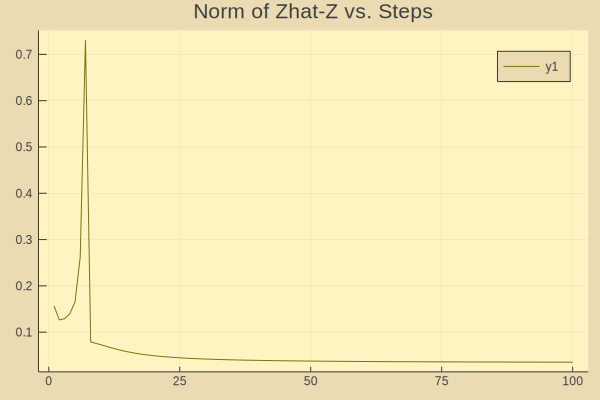

In [65]:
norms = []
Z̃ = randn(size(Ztrue));
for i in 1:100
    Z̃ = step(X, D, Z̃, 1e-1)
    push!(norms, norm(Z̃-Ztrue))
end
Plots.plot(norms, title="Norm of Zhat-Z vs. Steps")

## Learn D

In [58]:
function stepd(X, D, Z, μ=1e-4)
    D̃ = D - μ*(D*Z-X)*(Z)'
    ∞ = typemax(typeof(D̃[1,1]))
    clamp!(D̃, 0, ∞)
    return D̃ ./ sum(D̃, dims=1)
end

stepd (generic function with 2 methods)

In [59]:
stepd(X, D̃, Ztrue)

5×3 Array{Float64,2}:
 0.140636  0.302064   0.2298
 0.205014  0.0763819  0.292263
 0.202100  0.303796   0.0522607
 0.322455  0.110416   0.35902
 0.129795  0.207342   0.066656

In [60]:
DNorms = []
ZNorms = []
D̃ = rand(Uniform(0, 1), (5,3));
Z̃ = rand(Uniform(0, 1), size(D, 2));

for i=1:100
    D̃ = stepd(X, D̃, Z̃, 1e-4)
    Z̃ = step(X, D̃, Z̃, 1e-4)
    push!(DNorms, norm(D̃-D))
    push!(ZNorms, norm(Z̃-Ztrue))
end

plot(DNorms./maximum(DNorms), lab="D norms")
plot!(ZNorms./maximum(ZNorms), lab="Z norms")

UndefVarError: UndefVarError: plot not defined

$\mu$